In [299]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina' # on mac

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from utils.mag_scripts import * 
from utils.barplots import * 


import altair as alt

In [257]:
working_dir='.'

### Load Taxonomy

In [258]:
DT= pd.read_table(f'{working_dir}/genomes/taxonomy/gtdb/gtdbtk.bac120.summary.tsv',index_col=0)

display(DT.head())


Tax= tax2table(DT.classification, remove_prefix=True)
Tax.head()


,classification,fastani_reference,fastani_reference_radius,fastani_taxonomy,fastani_ani,fastani_af,closest_placement_reference,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",aa_percent,translation_table,red_value,warnings
user_genome,,,,,,,,,,,,,,,,,,
MAG2,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,GCF_000014485.1,95.0,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,99.08,0.92,GCF_000014485.1,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,99.08,0.92,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...,ANI/Placement,topological placement and ANI have congruent s...,"GCF_000188295.1, s__Streptococcus vestibularis...",98.29,11,NaN,NaN
MAG1,d__Bacteria;p__Firmicutes;c__Bacilli;o__Mycopl...,GCF_000383515.1,95.0,d__Bacteria;p__Firmicutes;c__Bacilli;o__Mycopl...,99.71,0.99,GCF_000383515.1,d__Bacteria;p__Firmicutes;c__Bacilli;o__Mycopl...,99.71,0.99,d__Bacteria;p__Firmicutes;c__Bacilli;o__Mycopl...,ANI/Placement,topological placement and ANI have congruent s...,NaN,75.08,4,NaN,NaN
MAG3,d__Bacteria;p__Firmicutes;c__Bacilli;o__Mycopl...,GCF_000169535.1,95.0,d__Bacteria;p__Firmicutes;c__Bacilli;o__Mycopl...,99.50,1.00,GCF_000169535.1,d__Bacteria;p__Firmicutes;c__Bacilli;o__Mycopl...,99.50,1.00,d__Bacteria;p__Firmicutes;c__Bacilli;o__Mycopl...,ANI/Placement,topological placement and ANI have congruent s...,"GCF_000019345.1, s__Ureaplasma parvum, 95.0, 8...",77.02,4,NaN,NaN


,kindom,phylum,class,order,family,genus,species
user_genome,,,,,,,
MAG2,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,Streptococcus thermophilus
MAG1,Bacteria,Firmicutes,Bacilli,Mycoplasmatales,Metamycoplasmataceae,Mesomycoplasma,Mesomycoplasma hyorhinis
MAG3,Bacteria,Firmicutes,Bacilli,Mycoplasmatales,Mycoplasmoidaceae,Ureaplasma,Ureaplasma urealyticum


In [259]:
# create a short label for each species
Labels=Tax.ffill(axis=1).species.copy()
Labels.loc[Tax.species.isnull()]+= ' '+ Labels.index[Tax.species.isnull()]

# Genome quality 

In [314]:
genome_quality= pd.read_table(f'{working_dir}/genomes/checkm/completeness.tsv',index_col=0)

genome_quality['Quality_Score']= genome_quality.eval('Completeness -5*Contamination')
genome_quality['Lineage']= genome_quality['Marker lineage'].map(lambda s: s.split()[0])

genome_quality['Id']= genome_quality.index

genome_quality= genome_quality.join(Tax)
genome_quality['Name']= Labels

In [315]:

xscale = alt.Scale(domain=(0, 15))
yscale = alt.Scale(domain=(50, 101))

alt.Chart(genome_quality).mark_circle(opacity= .4).encode(
    alt.X('Contamination', scale=xscale),
    alt.Y('Completeness', scale=yscale),
    color='phylum',
    tooltip=['Name', 'Id', 'Contamination','Completeness' ]
).interactive()

alt.Chart(...)

# Count data

In [263]:
Counts= pd.read_csv(f'{working_dir}/genomes/counts/raw_counts_genomes.tsv',index_col=0,sep='\t')
Counts=Counts.T
Counts.head()

Sample,MAG1,MAG2,MAG3
sample1,926872,96617,0
sample2,92904,966225,88302


## Mapping rate

sample1    0.967364
sample2    0.965563
dtype: float64

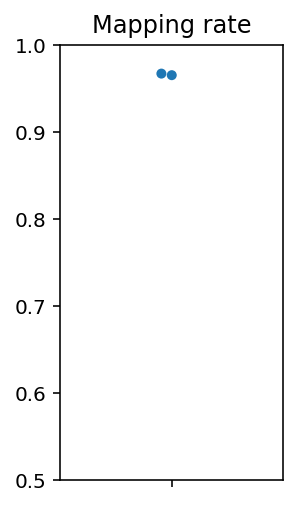

In [264]:
Nreads= pd.read_table('../WD/stats/read_counts.tsv', index_col=[0,1])

mapping_rate =  Counts.sum(1)/( 2* Nreads.Total_Reads.unstack().QC)

f,ax= plt.subplots(figsize=(2,4))
ax.set_ylim([0.5,1])
sns.swarmplot(y= mapping_rate,ax=ax)

ax.set_title('Mapping rate')


mapping_rate

## Stats based on raw Counts

There are good reasons to use rawcounts and use centric log ratios, see more in 

Gloor, Gregory B., Jean M. Macklaim, Vera Pawlowsky-Glahn, and Juan J. Egozcue. 2017. “Microbiome Datasets Are Compositional: And This Is Not Optional.” Frontiers in Microbiology 8 (November). Frontiers: 2224. doi:10.3389/fmicb.2017.02224.


For differencial abundance analysis see also the same paper.

Raw counts samples x MAGs 

# transforme counts

centrig log ratio

In [316]:
data= clr(Counts)


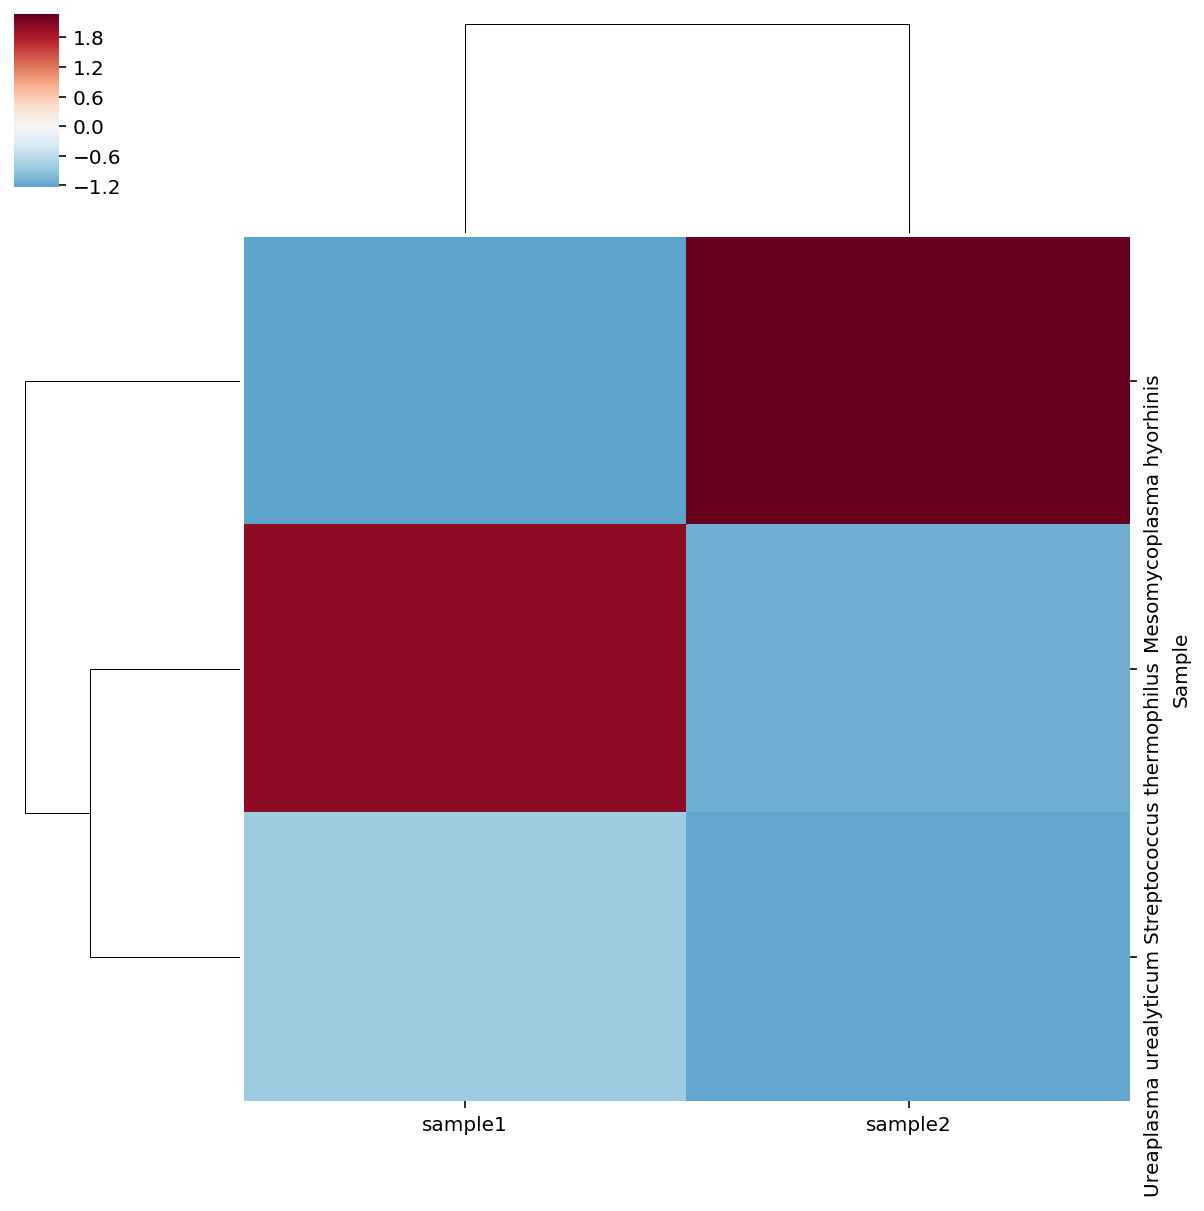

In [317]:
sns.clustermap(data.T,
            row_cluster=True,cmap='RdBu_r', center=0,
             yticklabels= Labels,
              )


# PCA (PCoA) of the robust aitchison distance

In [267]:
from sklearn.decomposition import PCA

pca= PCA()
transformed_data= pca.fit_transform(data)


In [268]:
pca_data= pd.DataFrame()
pca_data['PC 1']= transformed_data[:,0]
pca_data['PC 2']= transformed_data[:,1]
pca_data['Sample']= data.index



alt.Chart(pca_data).mark_circle(size=60).encode(
    x='PC 1',
    y='PC 2',
    tooltip=['Sample' ]
).interactive()


alt.Chart(...)

# Relative abundance


For the relative abundance we take the coverage over the genome not the raw counts. This inmplicit normalizes for genome size. The coverage is calculated as the median of the coverage values calculated in 1kb blocks.

In [322]:
D = pd.read_table(f'{working_dir}/genomes/counts/median_coverage_genomes.tsv',index_col=0)
D.head()

,MAG1,MAG2,MAG3
sample1,127.250,5.65,0.000
sample2,12.675,56.66,11.865


In [323]:
#calculate relative abundance

relab = (D.T/D.sum(1)).T

Text(0, 0.5, 'Abundance [relab]')

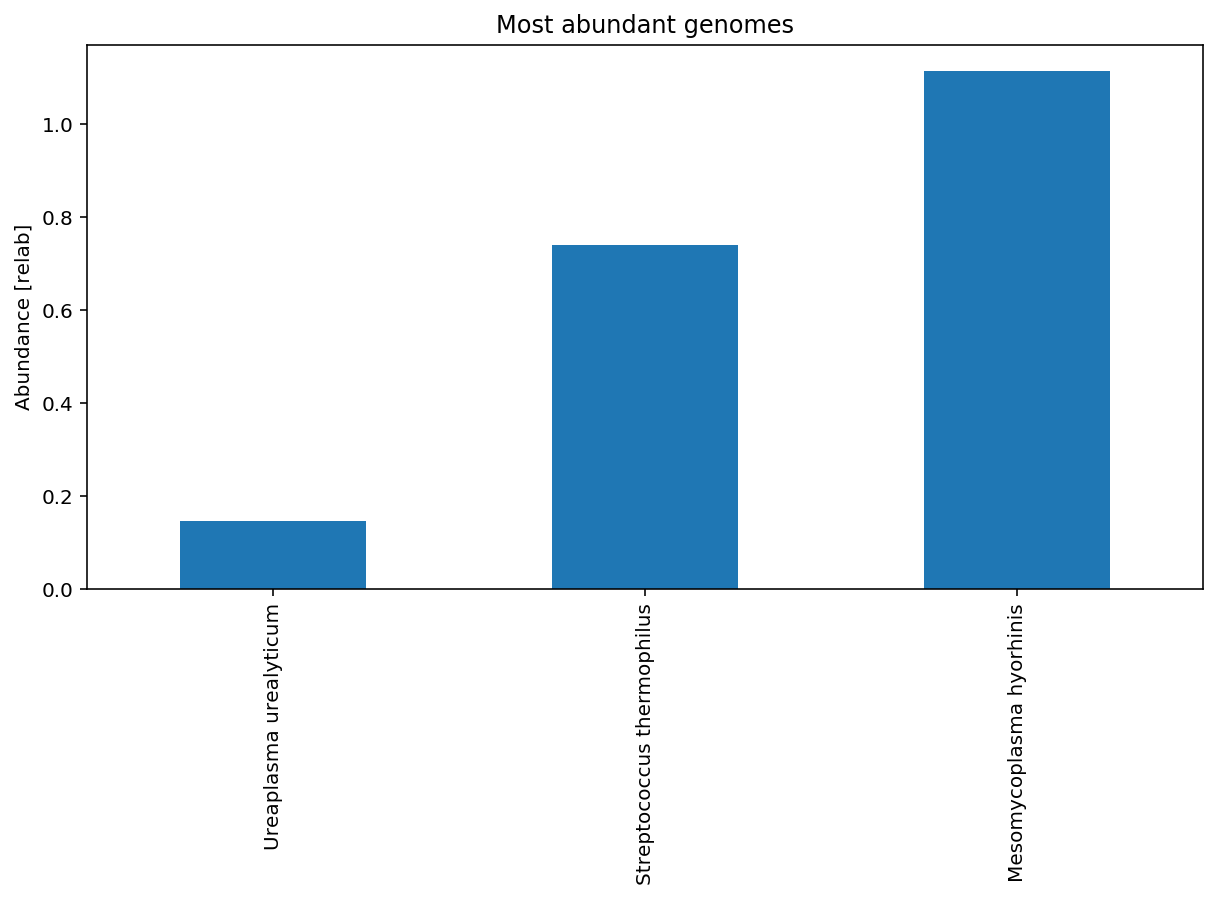

In [324]:
# get most abundant genomes

counts_per_genome= relab.sum().sort_values()
ax= counts_per_genome[-10:].plot.bar(figsize=(10,5))

_= ax.set_xticklabels(Labels.loc[counts_per_genome.index[-10:]])
ax.set_title('Most abundant genomes')
ax.set_ylabel('Abundance [relab]')

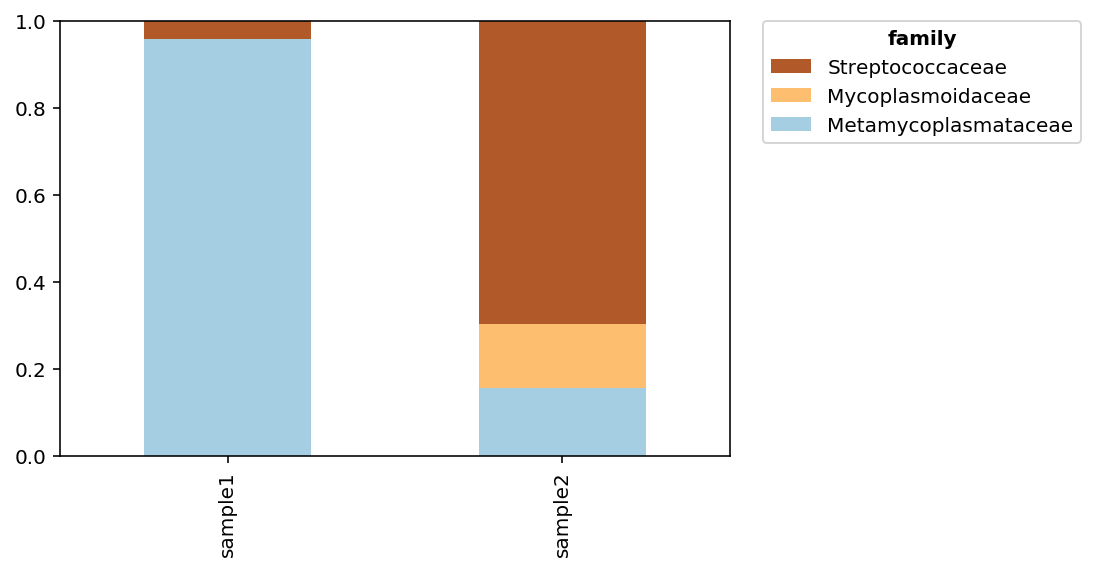

In [325]:
# Typical bar chart at specific level
level='family'

grouped_data =relab.groupby(Tax[level],axis=1).sum()

ax= BarPlot(grouped_data)

ax.legend_.set_title(level,{'weight':'bold'})


# Functional annotation


In [1]:
#CAZy
CAZy_annotations_genome= pd.read_table(f'{working_dir}/genomes/annotations/CAZy.tsv',index_col=0)
CAZy_presence= (CAZy_annotations_genome>0).astype(int)
CAZy_presence.head()


function_relab = relab @ CAZy_presence

sns.clustermap(function_relab)

function_relab.head()

NameError: name 'pd' is not defined

In [2]:
#Kegg orthologs

Kegg_annotations_genome= pd.read_table(f'{working_dir}/genomes/annotations/KO.tsv',index_col=0)
Kegg_presence= (Kegg_annotations_genome>0).astype(int)
Kegg_presence.head()


function_relab = relab @ Kegg_presence

sns.clustermap(function_relab)

function_relab.head()

NameError: name 'pd' is not defined

,CBM48,CBM50,CE1,GH13,GH23,GH31,GH32,GH33,GH37,GH5,...,GH66,GH68,GH77,GH9,GT1,GT2,GT28,GT35,GT4,GT51
sample1,1.000000,0.042513,0.042513,1.000000,1.000000,0.957487,0.042513,0.957487,0.957487,0.957487,...,0.042513,0.042513,0.042513,0.957487,0.042513,0.042513,0.042513,0.042513,0.042513,0.042513
sample2,0.853879,0.697783,0.697783,0.853879,0.853879,0.156096,0.697783,0.156096,0.156096,0.156096,...,0.697783,0.697783,0.697783,0.156096,0.697783,0.697783,0.697783,0.697783,0.697783,0.697783


In [333]:
# keggnames

KO_names= get_kegg_names("../data/KO_names.json")

KO_names.head()

K00844                                   HK; hexokinase
K12407                                 GCK; glucokinase
K00845                                 glk; glucokinase
K01810          GPI, pgi; glucose-6-phosphate isomerase
K06859    pgi1; glucose-6-phosphate isomerase, archaeal
Name: Name, dtype: object